# Chapter 12: Linear estimation models

Read the file Diamonds.csv 

1.Using the maximum likelihood approach develop a regression model for the outcome variable price based on the independent variables carat, depth, table, x, y, and z.  

2.Compute the SST and SSE values. What is the R2 value? 

3.Plot the errors and visually examine if the errors are reasonably normal. 

4.Based on a visual plot, assess if there is heteroscedasticity in the regression model. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

In [3]:
#diamonds csv imported into the directory.
diamonds = pd.read_csv("diamonds.csv")
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
print(diamonds.price.mean())
print(diamonds.price.std())

3932.799721913237
3989.4397381463023


1.Using the maximum likelihood approach develop a regression model for the outcome variable price based on the independent variables carat, depth, table, x, y, and z.

In [17]:
from statsmodels.base.model import GenericLikelihoodModel 

from scipy import stats 

 

class myMLEbase(GenericLikelihoodModel): 

    def loglike(self, params): 
        return stats.norm.logpdf(self.endog,loc=params[0],scale=params[1]).sum()  
exog = pd.DataFrame(np.ones([len(diamonds),2]),columns=['mean','std'],index=diamonds.index)  
endog = diamonds[['price']] # target 

 

mybase = myMLEbase(endog,exog) # setup 

print((mybase.fit(start_params=[3932, 3989],maxiter=2000)).summary()) 

Optimization terminated successfully.
         Current function value: 9.710335
         Iterations: 47
         Function evaluations: 94
                              myMLEbase Results                               
Dep. Variable:                  price   Log-Likelihood:            -5.2378e+05
Model:                      myMLEbase   AIC:                         1.048e+06
Method:            Maximum Likelihood   BIC:                         1.048e+06
Date:                Sun, 23 Oct 2022                                         
Time:                        16:32:15                                         
No. Observations:               53940                                         
Df Residuals:                   53939                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [11]:
from statsmodels.formula.api import ols 

res3 = ols("price ~ carat + depth + table + x + y + z", data=diamonds).fit() 

print(res3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:20:37   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.0

2.Compute the SST and SSE values. What is the R2 value?

In [10]:
SST = np.sum((diamonds['price'] - 3932)**2) 

SST 

858473170015

In [ ]:
SSE = 

Rsquared is 0.859

3.Plot the errors and visually examine if the errors are reasonably normal.

4.Based on a visual plot, assess if there is heteroscedasticity in the regression model.

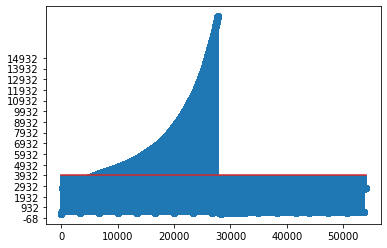

In [18]:
plt.stem(diamonds['price']-3932)  

# diff to baseline 

ticks = np.arange(-4000,12000,1000)  
# ticks from 660-baseline  

plt.yticks(ticks=ticks, labels=ticks+3932) # show full values 

plt.show()  

Read the file UsedCars2017.csv 

Using the maximum likelihood approach develop a regression model for the outcome variable Price based on the other variables in the dataframe.  

Compute the SST and SSE values. What is the R2 value? 

Plot the errors and visually examine if the errors are reasonably normal. 

Based on a visual plot, assess if there is heteroscedasticity in the regression model. 

In [19]:
#diamonds csv imported into the directory.
cars = pd.read_csv("UsedCars2017.csv")
cars.head(5)

,Price,Age,Mileage,MPG,KBB Price,CR Reliability Score
0,11858.0,6.0,69.7,34.0,10600.0,0.80
1,3092.0,17.0,166.7,21.0,2400.0,0.67
2,14300.0,4.0,42.3,35.0,11100.0,0.75
3,10942.0,6.0,84.4,28.0,8500.0,0.92
4,12968.0,5.0,56.6,27.0,10000.0,0.56


In [20]:
print(cars.Price.mean())
print(cars.Price.std())

7095.789975649351
5002.300711379531


In [21]:
class myMLEbase(GenericLikelihoodModel): 

    def loglike(self, params): 
        return stats.norm.logpdf(self.endog,loc=params[0],scale=params[1]).sum()  
exog = pd.DataFrame(np.ones([len(cars),2]),columns=['mean','std'],index=cars.index)  
endog = cars[['Price']] # target 

 

mybase = myMLEbase(endog,exog) # setup 

print((mybase.fit(start_params=[7095, 5002],maxiter=2000)).summary()) 

Optimization terminated successfully.
         Current function value: 9.936490
         Iterations: 53
         Function evaluations: 105
                              myMLEbase Results                               
Dep. Variable:                  Price   Log-Likelihood:                -48967.
Model:                      myMLEbase   AIC:                         9.794e+04
Method:            Maximum Likelihood   BIC:                         9.794e+04
Date:                Sun, 23 Oct 2022                                         
Time:                        16:35:57                                         
No. Observations:                4928                                         
Df Residuals:                    4927                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
SST = np.sum((diamonds['price'] - 3932)**2) 

SST 

In [ ]:
res3 = ols("Proce ~ Age + Mileage + table + x + y + z", data=diamonds).fit() 
Age	Mileage	MPG	KBB Price	CR Reliability Score
print(res3.summary()) 